In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in data

In [3]:
path = "../stat441 project/"
train = pd.read_csv(path + "modified_train.csv")
test = pd.read_csv(path+"modified_test.csv")

In [4]:
print('size of train_df data',train.shape) 
print('size of test_df data',test.shape) 

size of train_df data (30080, 127)
size of test_df data (9245, 126)


In [5]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

In [6]:
randomForest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
x_train = train.drop(['id','satisfied'],axis=1)
y_train = train['satisfied']

In [8]:
train['satisfied'].value_counts()

1.0    15626
0.0    14454
Name: satisfied, dtype: int64

In [9]:
base_rf = RandomForestClassifier(oob_score = True, random_state=42,class_weight='balanced')
base_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

In [10]:
y_train_hat = base_rf.predict(x_train)

print('train accuracy_score:', metrics.accuracy_score(y_train,y_train_hat))
print('train auc_sorce:', metrics.roc_auc_score(y_train,y_train_hat))
print('Out of Bag:',base_rf.oob_score_)

train accuracy_score: 0.9909574468085106
train auc_sorce: 0.9911227222899549
Out of Bag: 0.706748670212766


In [11]:
param = range(1,211,10)
parameters ={'n_estimators':param}
gs_rf = GridSearchCV(estimator=RandomForestClassifier(oob_score = True, random_state=42,class_weight='balanced'), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'n_estimators': 201} 0.8560283772525659


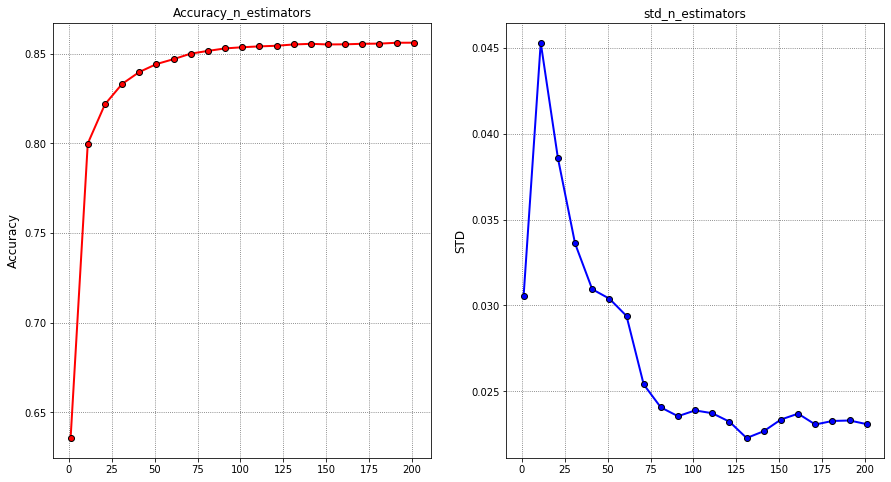

In [12]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [13]:
# when n=130, there is no obvious change of the accuracy

In [14]:
param = ['gini','entropy']
parameters ={'criterion':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators = 130,oob_score = True, random_state=42,class_weight='balanced'), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'criterion': 'entropy'} 0.859819246210354


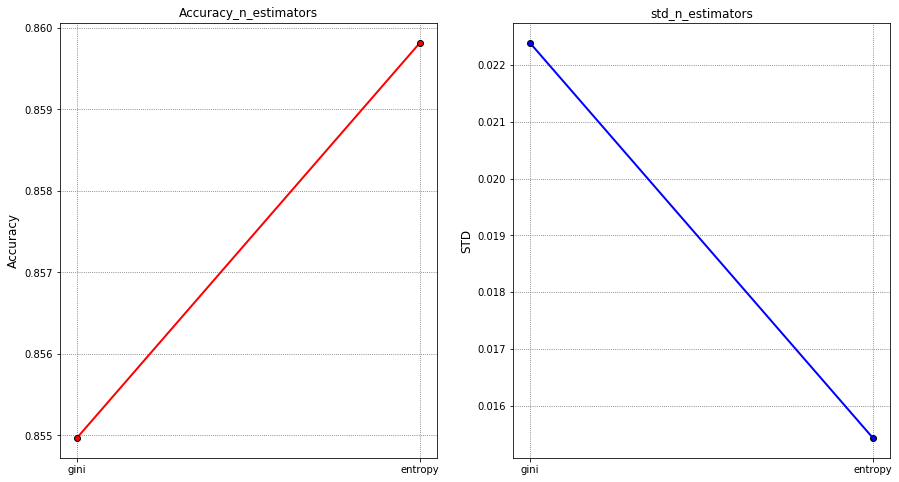

In [15]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [19]:
# max_features 默认值是sqrt(features) = sqrt(126) = 11
param = range(10,20,1)
parameters ={'max_features':param}

gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators = 130,criterion = 'entropy',oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_features': 19} 0.8632734308150533


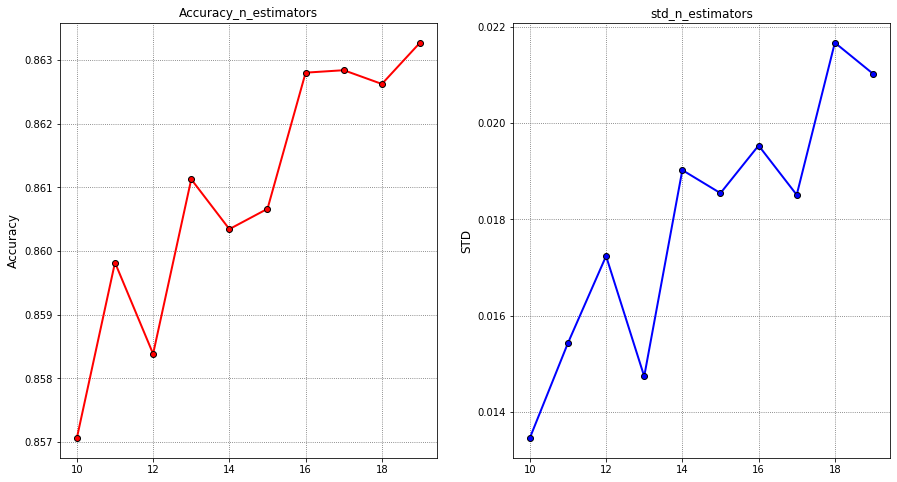

In [20]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [21]:
# max_features 默认值是sqrt(features) = sqrt(126) = 11
param = range(18,30,1)
parameters ={'max_features':param}

gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators = 130,criterion = 'entropy',oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_features': 22} 0.8647067199591673


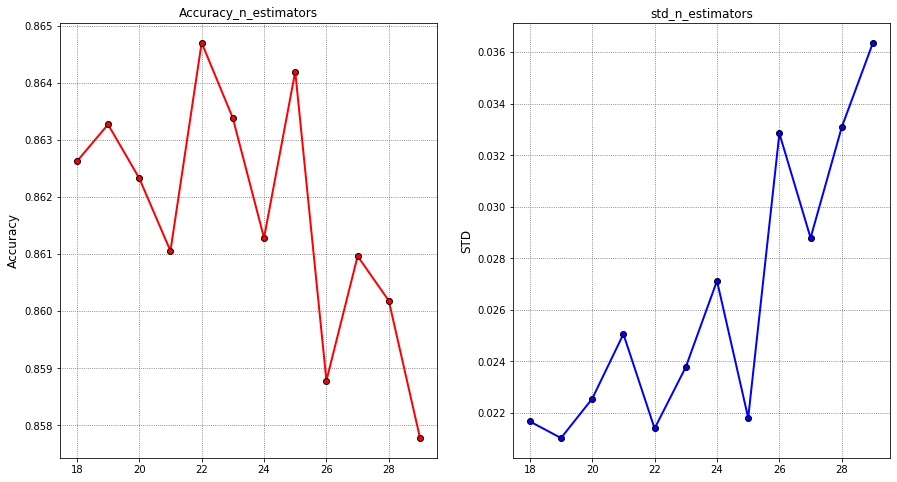

In [22]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [23]:
param = np.arange(1,110,10)
parameters ={'max_depth':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(
    n_estimators = 130,criterion = 'entropy',max_features=22 ,oob_score = True,class_weight='balanced', random_state=42),
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_depth': 11} 0.8658337287511264


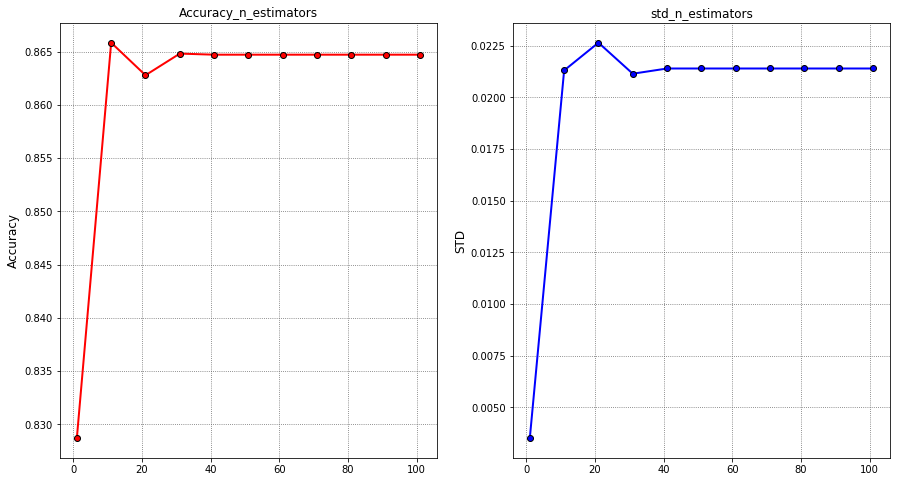

In [24]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [25]:
param = np.arange(1,22,2)
parameters ={'max_depth':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(
    n_estimators = 130,criterion = 'entropy',max_features=22 ,oob_score = True,class_weight='balanced', random_state=42),
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_depth': 13} 0.8679491418065131


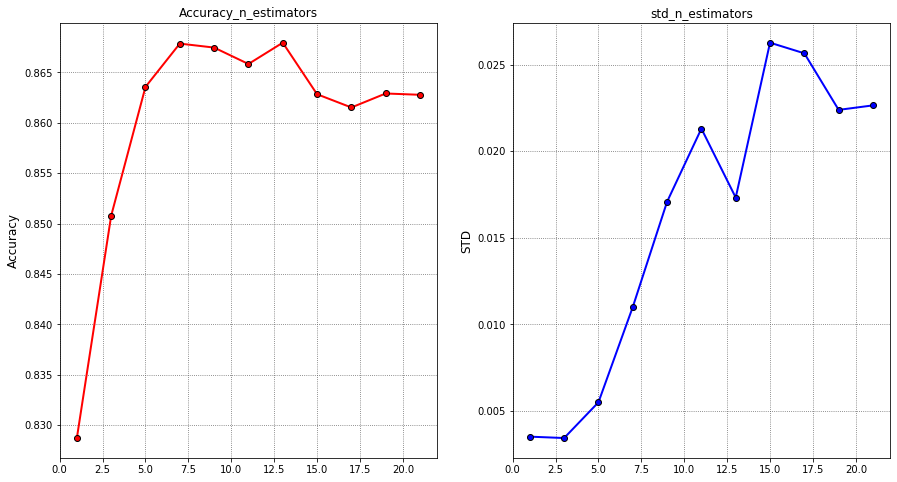

In [26]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [29]:
param = range(2,22,2)
parameters ={'min_samples_split':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(
    n_estimators = 130,criterion = 'entropy',max_features =22 ,max_depth = 13,oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_) 

best_params: {'min_samples_split': 2} 0.8679491418065131


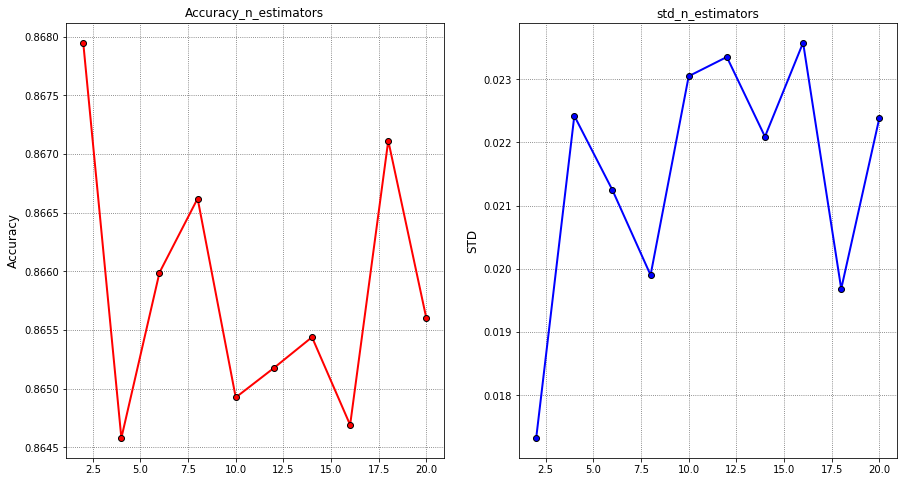

In [30]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [31]:
param = range(2,22,2)
parameters ={'min_samples_leaf':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators = 130,criterion = 'entropy',max_features = 22,
     max_depth = 13,min_samples_split=2,oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_) 

best_params: {'min_samples_leaf': 18} 0.8721279662587774


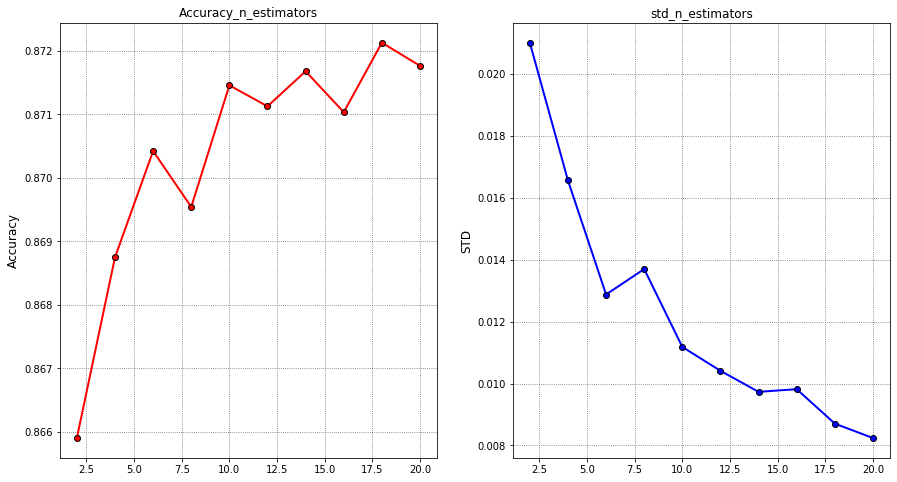

In [32]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [33]:
param = range(16,30,2)
parameters ={'min_samples_leaf':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators = 130,criterion = 'entropy',max_features = 22,
     max_depth = 13,min_samples_split=2,oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_) 

best_params: {'min_samples_leaf': 26} 0.8730408976966787


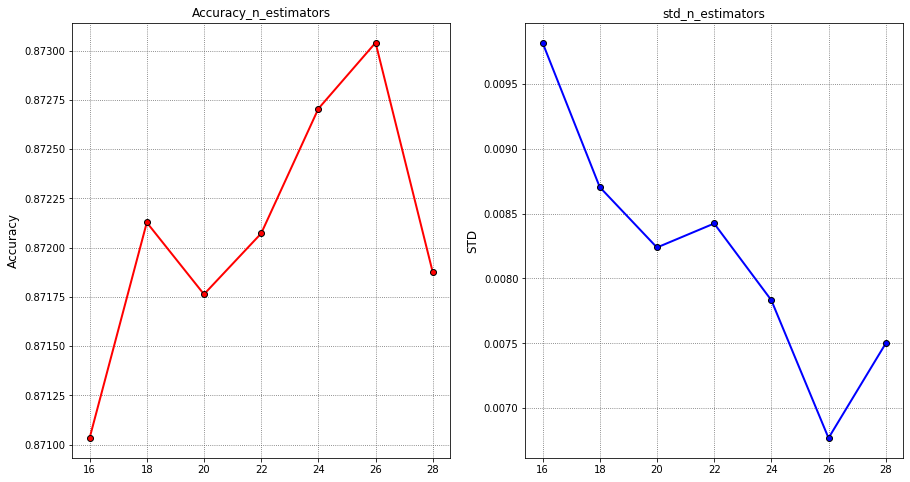

In [34]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [35]:
param = range(20,250,30)
parameters ={'max_leaf_nodes':param}

gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators = 130,criterion = 'entropy',max_features =22 ,max_depth =13
                                     ,min_samples_split=2,
                                     min_samples_leaf=26 ,oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_leaf_nodes': 170} 0.8721952357360225


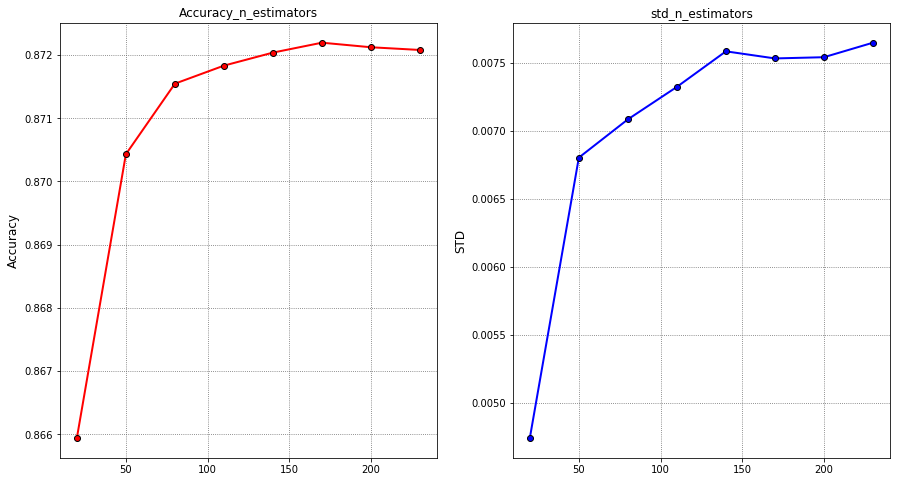

In [36]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

In [8]:
rf = RandomForestClassifier(n_estimators = 130,criterion = 'entropy',max_features =22, max_depth = 13,
                    min_samples_split=2, min_samples_leaf=26,max_leaf_nodes=170,oob_score = True,class_weight='balanced', random_state=42)
rf.fit(x_train,y_train)
y_train_hat = rf.predict(x_train)

print('train accuracy_score:', metrics.accuracy_score(y_train,y_train_hat))
print('train auc_sorce:', metrics.roc_auc_score(y_train,y_train_hat))
print('Out of Bag:',rf.oob_score_) 

train accuracy_score: 0.8195478723404256
train auc_sorce: 0.8180125615450303
Out of Bag: 0.8033909574468086


In [9]:
test_X = test.drop('id',axis=1)
predictions_prob = rf.predict_proba(test_X)
predictions = predictions_prob[:,1]

In [10]:
submission_rf = pd.DataFrame({'id': test['id'],
                            'Predicted': predictions})
submission_rf.to_csv("submission_rf.csv", index=False)